In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1BFc2Lt2N1swO8BKRvLMEyUhLzF52RFvr',
dest_path='content/covid_image_data.zip',
unzip=True)

Unzipping...Done.


In [1]:
pip freeze > req.txt

#Loading and preparing training data

The train and test images are given in two different folders - 'train' and 'test'. The labels of train images are given in a csv file 'Training_set_face_mask.csv' with respective image id (i.e. image file name).

Getting the labels of the images

In [ ]:
import pandas as pd # Data analysis and manipultion tool
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import matplotlib.pyplot as plt
import tensorflow as tf # Deep Learning Tool
import os # OS module in Python provides a way of using operating system dependent functionality
import cv2 # Library for image processing
from sklearn.model_selection import train_test_split # For splitting the data into train and validation set
from sklearn.metrics import f1_score

Getting images file path

In [ ]:
labels = pd.read_csv("/content/content/covid_image_data/Training_set_covid.csv") # loading the labels
labels.head() # will display the first five rows in labels dataframe

,filename,label
0,Image_1.jpg,1
1,Image_2.jpg,0
2,Image_3.jpg,0
3,Image_4.jpg,0
4,Image_5.jpg,0


In [ ]:
labels.tail() # will display the last five rows in labels dataframe

,filename,label
3474,Image_3475.jpg,0
3475,Image_3476.jpg,0
3476,Image_3477.jpg,0
3477,Image_3478.jpg,1
3478,Image_3479.jpg,0


In [ ]:
file_paths = [[fname, '/content/content/covid_image_data/train/' + fname] for fname in labels['filename']]
file_paths[0:10]

[['Image_1.jpg', '/content/content/covid_image_data/train/Image_1.jpg'],
 ['Image_2.jpg', '/content/content/covid_image_data/train/Image_2.jpg'],
 ['Image_3.jpg', '/content/content/covid_image_data/train/Image_3.jpg'],
 ['Image_4.jpg', '/content/content/covid_image_data/train/Image_4.jpg'],
 ['Image_5.jpg', '/content/content/covid_image_data/train/Image_5.jpg'],
 ['Image_6.jpg', '/content/content/covid_image_data/train/Image_6.jpg'],
 ['Image_7.jpg', '/content/content/covid_image_data/train/Image_7.jpg'],
 ['Image_8.jpg', '/content/content/covid_image_data/train/Image_8.jpg'],
 ['Image_9.jpg', '/content/content/covid_image_data/train/Image_9.jpg'],
 ['Image_10.jpg', '/content/content/covid_image_data/train/Image_10.jpg']]

Confirming if no. of labels is equal to no. of images

In [ ]:
# Confirm if number of images is same as number of labels given
if len(labels) == len(file_paths):
  print('Number of labels i.e. ', len(labels), 'matches the number of filenames i.e. ', len(file_paths))
else:
  print('Number of labels does not match the number of filenames')

Number of labels i.e.  3479 matches the number of filenames i.e.  3479


Converting the file_paths to dataframe

In [ ]:
images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
images.head()

,filename,filepaths
0,Image_1.jpg,/content/content/covid_image_data/train/Image_...
1,Image_2.jpg,/content/content/covid_image_data/train/Image_...
2,Image_3.jpg,/content/content/covid_image_data/train/Image_...
3,Image_4.jpg,/content/content/covid_image_data/train/Image_...
4,Image_5.jpg,/content/content/covid_image_data/train/Image_...


In [ ]:
# Combining the labels with the images
train_data = pd.merge(images, labels, how = 'inner', on = 'filename')
train_data[0:20]

,filename,filepaths,label
0,Image_1.jpg,/content/content/covid_image_data/train/Image_...,1
1,Image_2.jpg,/content/content/covid_image_data/train/Image_...,0
2,Image_3.jpg,/content/content/covid_image_data/train/Image_...,0
3,Image_4.jpg,/content/content/covid_image_data/train/Image_...,0
4,Image_5.jpg,/content/content/covid_image_data/train/Image_...,0
5,Image_6.jpg,/content/content/covid_image_data/train/Image_...,0
6,Image_7.jpg,/content/content/covid_image_data/train/Image_...,0
7,Image_8.jpg,/content/content/covid_image_data/train/Image_...,0
8,Image_9.jpg,/content/content/covid_image_data/train/Image_...,0
9,Image_10.jpg,/content/content/covid_image_data/train/Image_...,0


Data Pre-processing

In [ ]:
data = [] # initialize an empty numpy array
denoised_data = [] # denoised image
image_size = 100 # image size taken is 100 here. one can take other size too
for i in range(len(train_data)):
  img_array = cv2.imread(train_data['filepaths'][i], cv2.IMREAD_GRAYSCALE) # converting the image to gray scale
  new_img_array = cv2.resize(img_array, (image_size, image_size)) # resizing the image array
  data.append([new_img_array, train_data['label'][i]])
  denoised_data.append([cv2.GaussianBlur(new_img_array,(5,5),0), train_data['label'][i]])

0


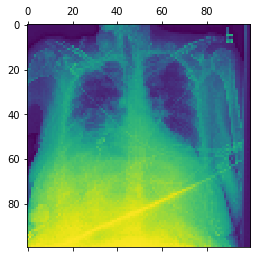

In [ ]:
# image pixels of a image
data[0]
print(data[20][1])
plt.matshow(data[20][0])

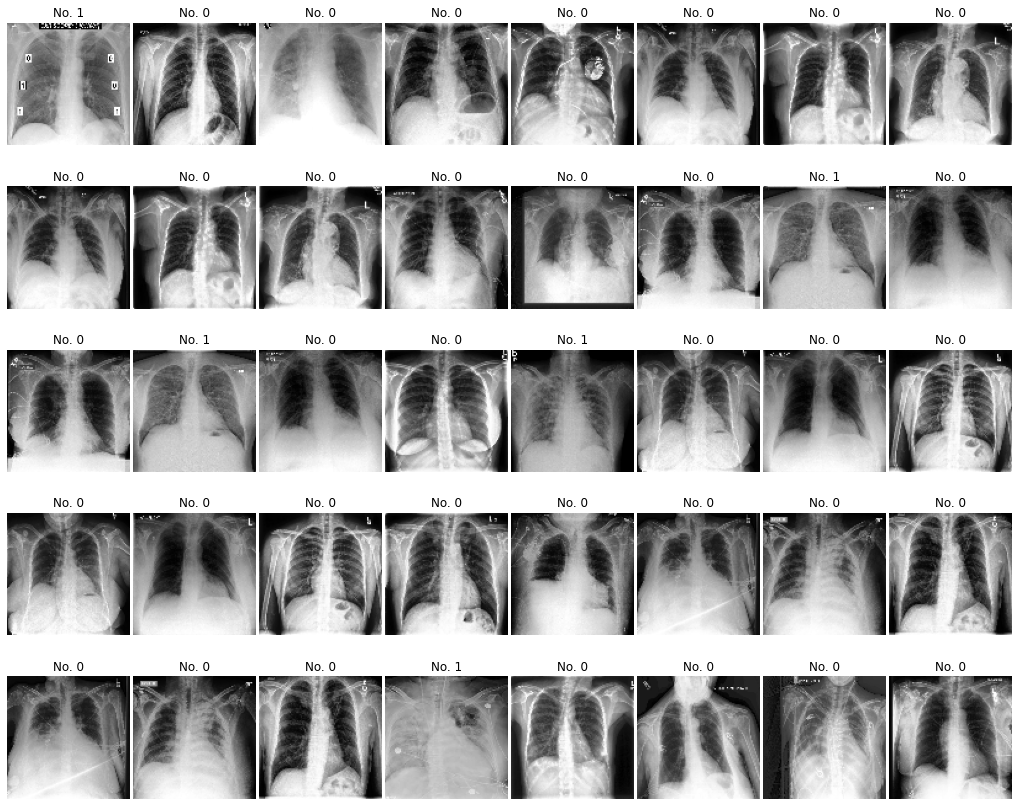

In [ ]:
# code to view the images
num_rows, num_cols = 5, 8
f, ax = plt.subplots(num_rows, num_cols, figsize=(18,15),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( data[image_index][0], cmap='gray')
        ax[r,c].set_title('No. %d' % data[image_index][1])
plt.show()
plt.close()

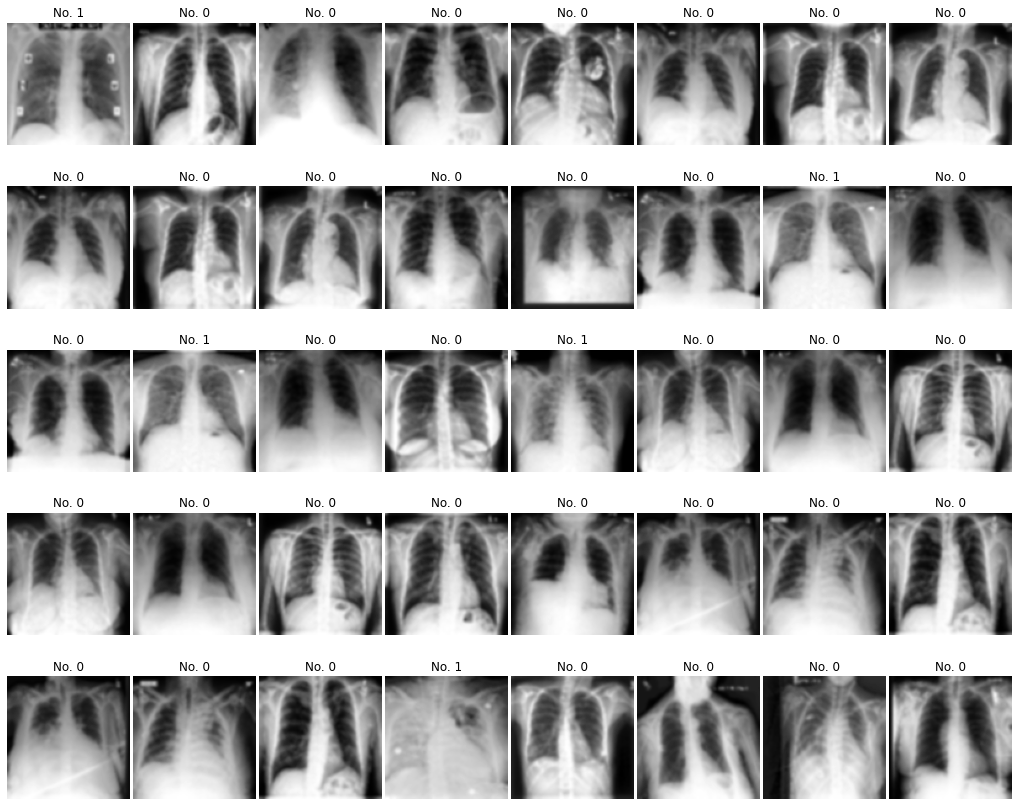

In [ ]:
# code to view the images
num_rows, num_cols = 5, 8
f, ax = plt.subplots(num_rows, num_cols, figsize=(18,15),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( denoised_data[image_index][0], cmap='gray')
        ax[r,c].set_title('No. %d' % denoised_data[image_index][1])
plt.show()
plt.close()

In [ ]:
print(len(data), len(data[0][0]))
data[0][0]

3479 100


array([[110, 114, 118, ..., 129, 122, 227],
       [123, 124, 127, ..., 130, 127, 131],
       [156, 128, 134, ..., 124, 132,  94],
       ...,
       [166, 206, 224, ..., 194, 190, 162],
       [177, 203, 217, ..., 197, 190, 166],
       [194, 200, 205, ..., 199, 183, 163]], dtype=uint8)

In [ ]:
np.random.shuffle(data)

In [ ]:
x = []
y = []
for image in data:
  x.append(image[0])
  y.append(image[1])

# converting x & y to numpy array as they are list
x = np.array(x)
y = np.array(y)

In [ ]:
x.shape

(3479, 100, 100)

#Splitting the data
We want to check the performance of the model that we built. For this purpose, we always split (both input and output data) the given data into training set which will be used to train the model, and validation set which will be used to check how accurately the model is predicting outcomes.

For this purpose we have a class called 'train_test_split' in the 'sklearn.model_selection' module.

We split 70% of the data to the training set while 30% of the data to test set using below code. The test_size variable is where we actually specify the proportion of the test set.

By passing our X and y variables into the train_test_split method, we are able to capture the splits in data by assigning 4 variables to the result.

In [ ]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 42)

In [ ]:
X_train.shape

(2435, 100, 100)

Let's normalize our data (i.e. both X_train and X_test). Normalization is a process that changes the range of pixel intensity values to the range 0 to 1.

But why to normalize?

The motivation to normalize is to achieve consistency in dynamic range for a set of data, signals, or images to avoid mental distraction and reduce the data redundancy. Also, normalizing the data can help you improve the model performance.


In [ ]:
X_train = X_train / 255
X_test = X_test / 255

"""
The pixel value lie in the range 0 - 255 representing the RGB (Red Green Blue) value. """

'\nThe pixel value lie in the range 0 - 255 representing the RGB (Red Green Blue) value. '

In [ ]:
X_train.shape

(2435, 100, 100)

The data is 3 dimensional. The first value i.e. 2435 is nothing but the number of records or images in this case. The second and third dimension represent each individual image i.e. each image is of shape 100X100.

Most of the the supervised learning algorithms that execute classification and regression tasks, as well as some deep learning models built for this purposes, are fed with two-dimensional data. Since we have our data as three-dimensional, we will need to flatten our data to make it two-dimensional.


In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 100*100)    # converting our 2D array representin an image to one dimensional
X_test_flattened = X_test.reshape(len(X_test), 100*100)

In [ ]:
X_train_flattened.shape

(2435, 10000)

In [ ]:
X_test_flattened.shape

(1044, 10000)

#Model Building
Now that we have our data fully processed and split into training and testing datasets, we can begin building a neural network to solve this classification problem. below is what ad densely connected neural network looks like

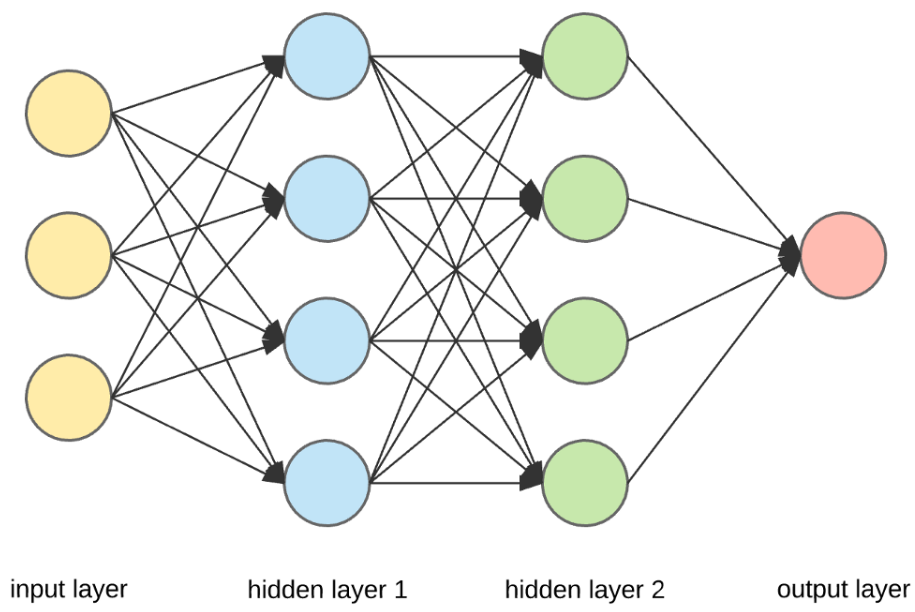

##There are 5 life cycles that our model goes through:
  ### 1. Definition
  ### 2. compilation
  ### 3. fitting
  ### 4. predicting 
  ### 5. evaluating

lets go through each step for different models
 

In [ ]:
# Imports
import tensorflow as tf  # Importing the TensorFlow Library
from tensorflow import keras  # Import Keras from TensorFlow
from tensorflow.keras import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense  denoised_data.append([cv2.GaussianBlur(new_img_array,(5,5),0), train_data['label'][i]])
%load_ext tensorboard
import datetime
from tensorflow.keras.utils import plot_model

**callback to restore best weights**

In [ ]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, 
                                               restore_best_weights=True,
                                               verbose=1)

In [ ]:
def plot_results(history):
  print(history.history.keys())
#  "Accuracy"
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
  # "Loss"
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

##**Model 1**
##**multi layer perceptron with 94.6% validation accuracy** 

lets try model 1 first with multilayer perceptron with four layers



### Model Definition
---
Defining the model requires that you first select the type of model that you need and then choose the architecture or network topology.


In [ ]:
# Defining the model
#Augmenting the images
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
    ]
)

model1 = tf.keras.Sequential([
# data_augmentation,           
tf.keras.layers.Flatten(batch_input_shape=(None, 100, 100)), # flattening the image
tf.keras.layers.Dense(100, activation='relu'),
tf.keras.layers.Dense(50, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
])

### Model Compilation
---
Compiling the model requires that you first select a loss function that you want to optimize, such as mean squared error or cross-entropy usually for binary classification.

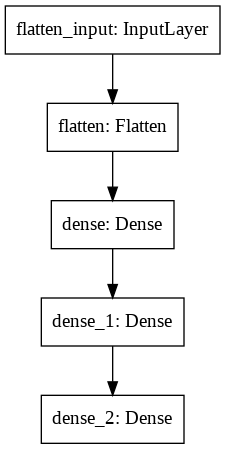

In [ ]:
model1.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])
plot_model(model1)

### Fitting the Model

---

In [ ]:
history1 = model1.fit(X_train, y_train,validation_split=0.2, epochs=10, callbacks=[es_callback], batch_size=10)

Epoch 1/10
195/195 [==============================] - 3s 4ms/step - loss: 0.5659 - accuracy: 0.8237 - val_loss: 0.3019 - val_accuracy: 0.8891
Epoch 2/10
195/195 [==============================] - 1s 3ms/step - loss: 0.2268 - accuracy: 0.9145 - val_loss: 0.2858 - val_accuracy: 0.8973
Epoch 3/10
195/195 [==============================] - 1s 3ms/step - loss: 0.2139 - accuracy: 0.9140 - val_loss: 0.2780 - val_accuracy: 0.8891
Epoch 4/10
195/195 [==============================] - 1s 3ms/step - loss: 0.2065 - accuracy: 0.9170 - val_loss: 0.2632 - val_accuracy: 0.8994
Epoch 5/10
195/195 [==============================] - 1s 3ms/step - loss: 0.1997 - accuracy: 0.9226 - val_loss: 0.2455 - val_accuracy: 0.9097
Epoch 6/10
195/195 [==============================] - 1s 3ms/step - loss: 0.1811 - accuracy: 0.9303 - val_loss: 0.2182 - val_accuracy: 0.9138
Epoch 7/10
195/195 [==============================] - 1s 3ms/step - loss: 0.1704 - accuracy: 0.9344 - val_loss: 0.2471 - val_accuracy: 0.9117
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


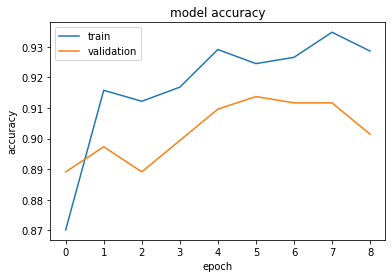

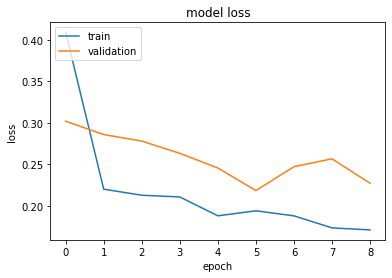

In [ ]:
plot_results(history1)

##**Model 2** 

### Model Definition
---
Defining the model requires that you first select the type of model that you need and then choose the architecture or network topology.


In [ ]:
#simple MLP with image size [100*100]. accuracy 40%
model2 = Sequential([
                    tf.keras.layers.Flatten(input_shape=(100,100)),
                    tf.keras.layers.Dense(512, activation='relu'),
                    tf.keras.layers.Dense(256,  activation='relu'),
                    tf.keras.layers.Dense(100, activation='relu'),                     
                    tf.keras.layers.Dense(1, activation='sigmoid')])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 5,277,641
Trainable params: 5,277,641
Non-trainable params: 0
_________________________________________________________________


### Model Compilation
---
Compiling the model requires that you first select a loss function that you want to optimize, such as mean squared error or cross-entropy usually for binary classification.

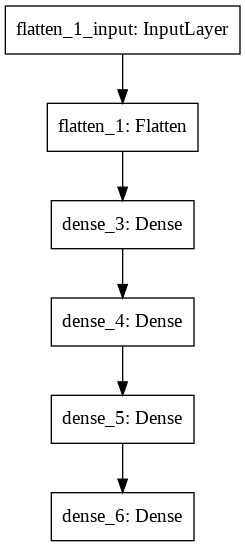

In [ ]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
plot_model(model2)

### Fitting the Model

---

In [ ]:
# history2 = model2.fit(X_train, y_train, 
#                      epochs = 20,
#                      verbose = 2,
#                      callbacks = [es_callback])
history2 = model2.fit(X_train, y_train, epochs=10,validation_split=0.2, callbacks=[es_callback], batch_size=10)

Epoch 1/10
195/195 [==============================] - 1s 4ms/step - loss: 0.5089 - accuracy: 0.8410 - val_loss: 0.2944 - val_accuracy: 0.8686
Epoch 2/10
195/195 [==============================] - 1s 4ms/step - loss: 0.2970 - accuracy: 0.9016 - val_loss: 0.2391 - val_accuracy: 0.8891
Epoch 3/10
195/195 [==============================] - 1s 4ms/step - loss: 0.2048 - accuracy: 0.9095 - val_loss: 0.2346 - val_accuracy: 0.9097
Epoch 4/10
195/195 [==============================] - 1s 4ms/step - loss: 0.2032 - accuracy: 0.9177 - val_loss: 0.2280 - val_accuracy: 0.9117
Epoch 5/10
195/195 [==============================] - 1s 4ms/step - loss: 0.1845 - accuracy: 0.9229 - val_loss: 0.2276 - val_accuracy: 0.9117
Epoch 6/10
195/195 [==============================] - 1s 4ms/step - loss: 0.1527 - accuracy: 0.9356 - val_loss: 0.2469 - val_accuracy: 0.9055
Epoch 7/10
195/195 [==============================] - 1s 4ms/step - loss: 0.1573 - accuracy: 0.9386 - val_loss: 0.3350 - val_accuracy: 0.9014
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


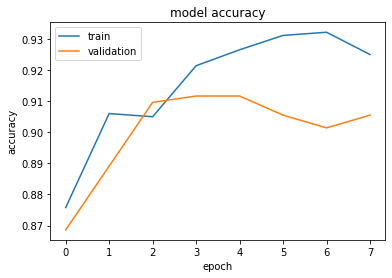

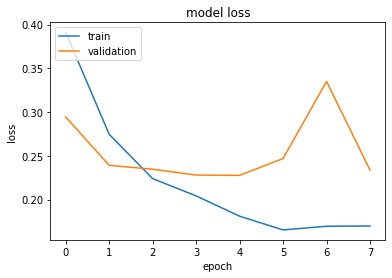

In [ ]:
plot_results(history2)

##**Model 3** 

model built using transferlearning pretrained model(MobileNet)


### Model Definition
---
Defining the model requires that you first select the type of model that you need and then choose the architecture or network topology.


In [ ]:
input_shape= (100,100,3)

from tensorflow.keras.applications.mobilenet import MobileNet
base_model = MobileNet(input_shape = input_shape, include_top = False, weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = True

#Augmenting the images
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
    ]
)

# model.add(base_model)

model3 = Sequential()
model3.add(data_augmentation)
model3.add(tf.keras.layers.Dense(15, input_shape=input_shape))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255))
# add dense layers with some dropout
model3.add(tf.keras.layers.Dense(512, activation='relu'))
model3.add(tf.keras.layers.Dropout(rate=0.25))
model3.add(tf.keras.layers.Dense(512, activation='relu'))
model3.add(tf.keras.layers.Dropout(rate=0.25))
model3.add(tf.keras.layers.Dense(1,activation='sigmoid'))

17227776/17225924 [==============================] - 0s 0us/step


### Model Compilation
---
Compiling the model requires that you first select a loss function that you want to optimize, such as mean squared error or cross-entropy usually for binary classification.

In [ ]:
from tensorflow.keras.optimizers import Adam

model3.compile(optimizer=Adam(lr=2e-5),loss='binary_crossentropy',metrics=['accuracy'])


### Fitting the Model

---

In [ ]:
stacked_img = np.stack((X_train,)*3, axis=-1)
print(stacked_img.shape)
history3 = model3.fit(stacked_img, y_train, validation_split=0.2,callbacks=[es_callback], epochs=30, verbose=1)

(2435, 100, 100, 3)
Epoch 1/30
61/61 [==============================] - 3s 31ms/step - loss: 0.5954 - accuracy: 0.8491 - val_loss: 0.3967 - val_accuracy: 0.8768
Epoch 2/30
61/61 [==============================] - 2s 27ms/step - loss: 0.3751 - accuracy: 0.8843 - val_loss: 0.3829 - val_accuracy: 0.8768
Epoch 3/30
61/61 [==============================] - 2s 27ms/step - loss: 0.3449 - accuracy: 0.8924 - val_loss: 0.3791 - val_accuracy: 0.8768
Epoch 4/30
61/61 [==============================] - 2s 27ms/step - loss: 0.3528 - accuracy: 0.8890 - val_loss: 0.3755 - val_accuracy: 0.8768
Epoch 5/30
61/61 [==============================] - 2s 28ms/step - loss: 0.3583 - accuracy: 0.8830 - val_loss: 0.3727 - val_accuracy: 0.8768
Epoch 6/30
61/61 [==============================] - 2s 27ms/step - loss: 0.3475 - accuracy: 0.8848 - val_loss: 0.3678 - val_accuracy: 0.8768
Epoch 7/30
61/61 [==============================] - 2s 28ms/step - loss: 0.3586 - accuracy: 0.8799 - val_loss: 0.3646 - val_accuracy: 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


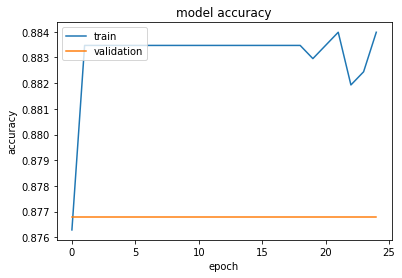

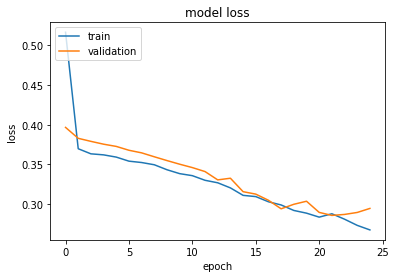

In [ ]:
plot_results(history3)

##**Model 4** 


### Model Definition
---
Defining the model requires that you first select the type of model that you need and then choose the architecture or network topology.


In [ ]:
input_shape = (100,100,3)
InceptionResNetV2_layers = tf.keras.applications.InceptionResNetV2(weights='imagenet', include_top=False, 
                                               input_shape=input_shape)

219062272/219055592 [==============================] - 2s 0us/step


In [ ]:
for layer in InceptionResNetV2_layers.layers:
    layer.trainable = True

In [ ]:
#define sequential model
model4 = tf.keras.models.Sequential()

#Add the vgg convolutional base model
#model.add(vgg_layers)
#model.add(ResNet_layers)
model4.add(InceptionResNetV2_layers)

# add flatten layer
model4.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model4.add(tf.keras.layers.Dense(512, activation='relu'))
model4.add(tf.keras.layers.Dropout(rate=0.25))
model4.add(tf.keras.layers.Dense(512, activation='relu'))
model4.add(tf.keras.layers.Dropout(rate=0.25))

# add output layer
model4.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# compile model
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# view model layers
model4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 1, 1, 1536)        54336736  
_________________________________________________________________
flatten_3 (Flatten)          (None, 1536)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               786944    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

### Model Compilation
---
Compiling the model requires that you first select a loss function that you want to optimize, such as mean squared error or cross-entropy usually for binary classification.

### Fitting the Model

---

In [ ]:
stacked_img = np.stack((X_train,)*3, axis=-1)
print(stacked_img.shape)
history4 = model4.fit(stacked_img, y_train, validation_split=0.2,callbacks=[es_callback], epochs=30, verbose=1)

(2435, 100, 100, 3)
Epoch 1/30
61/61 [==============================] - 32s 192ms/step - loss: 0.4564 - accuracy: 0.8720 - val_loss: 0.4195 - val_accuracy: 0.8768
Epoch 2/30
61/61 [==============================] - 8s 131ms/step - loss: 0.3294 - accuracy: 0.8852 - val_loss: 0.3695 - val_accuracy: 0.8768
Epoch 3/30
61/61 [==============================] - 8s 132ms/step - loss: 0.2678 - accuracy: 0.8920 - val_loss: 0.3389 - val_accuracy: 0.8830
Epoch 4/30
61/61 [==============================] - 8s 132ms/step - loss: 0.2673 - accuracy: 0.8846 - val_loss: 3.8577 - val_accuracy: 0.8912
Epoch 5/30
61/61 [==============================] - 8s 134ms/step - loss: 0.2100 - accuracy: 0.9089 - val_loss: 24.7902 - val_accuracy: 0.9035
Epoch 6/30
61/61 [==============================] - 8s 134ms/step - loss: 0.1724 - accuracy: 0.9261 - val_loss: 57.6778 - val_accuracy: 0.9076
Restoring model weights from the end of the best epoch.
Epoch 00006: early stopping


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


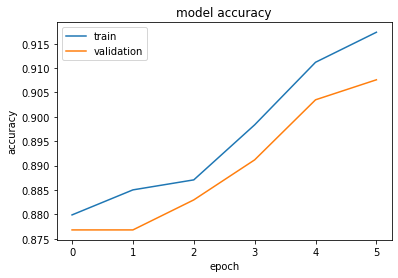

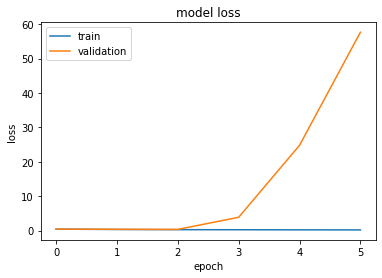

In [ ]:
plot_results(history4)

##**Model 5** 

CNN model built using transfer learning from VGG 19 model




### Model Definition
---
Defining the model requires that you first select the type of model that you need and then choose the architecture or network topology.


In [ ]:
# INPUT_SHAPE = (X_train_flattened.shape[1],)
# print(INPUT_SHAPE)
# get the VGG19 model
input_shape = (100,100,3)
vgg_layers = tf.keras.applications.vgg19.VGG19(weights='imagenet', include_top=False, 
                                               input_shape=(100,100,3))

#Augmenting the images
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
    ]
)

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
# Building the model
model5 = Sequential()
model5.add(data_augmentation)
model5.add(vgg_layers)
# add flatten layer
model5.add(tf.keras.layers.Flatten())
# add dense layers with some dropout
# add dense layers with some dropout
model5.add(tf.keras.layers.Dense(256, activation='relu'))
model5.add(tf.keras.layers.Dense(256, activation='relu'))
model5.add(tf.keras.layers.Dense(256, activation='relu'))
model5.add(tf.keras.layers.Dense(1, activation='sigmoid'))

### Model Compilation
---
Compiling the model requires that you first select a loss function that you want to optimize, such as mean squared error or cross-entropy usually for binary classification.

In [ ]:
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.001)  # Here, we have set our learning rate as 0.001
model5.compile(optimizer=optimizer, 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

### Fitting the Model

---

In [ ]:
stacked_img = np.stack((X_train,)*3, axis=-1)
history5 = model5.fit(stacked_img, y_train, validation_split=0.2, epochs=30, batch_size=30, callbacks = [es_callback], verbose=1)


Epoch 1/30
65/65 [==============================] - 13s 147ms/step - loss: 78321.3819 - accuracy: 0.8279 - val_loss: 0.3822 - val_accuracy: 0.8768
Epoch 2/30
65/65 [==============================] - 8s 129ms/step - loss: 0.4028 - accuracy: 0.8760 - val_loss: 0.3611 - val_accuracy: 0.8768
Epoch 3/30
65/65 [==============================] - 8s 130ms/step - loss: 0.4201 - accuracy: 0.8858 - val_loss: 0.3818 - val_accuracy: 0.8768
Epoch 4/30
65/65 [==============================] - 8s 130ms/step - loss: 0.3637 - accuracy: 0.8886 - val_loss: 0.3895 - val_accuracy: 0.8768
Epoch 5/30
65/65 [==============================] - 8s 130ms/step - loss: 1.3226 - accuracy: 0.8682 - val_loss: 0.3768 - val_accuracy: 0.8768
Restoring model weights from the end of the best epoch.
Epoch 00005: early stopping


In [ ]:
# printing the summary of the model
model5.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 100, 100, 3)       0         
_________________________________________________________________
vgg19 (Functional)           (None, 3, 3, 512)         20024384  
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               1179904   
_________________________________________________________________
dense_15 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

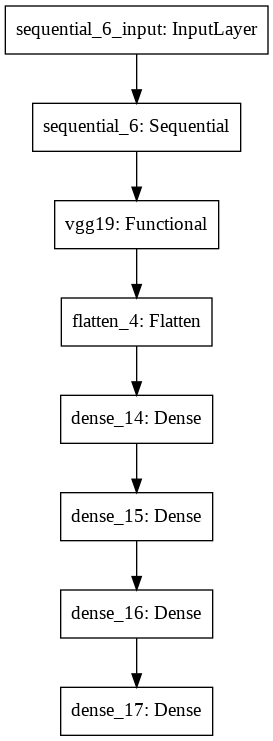

In [ ]:
# plotting the model
plot_model(model5)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


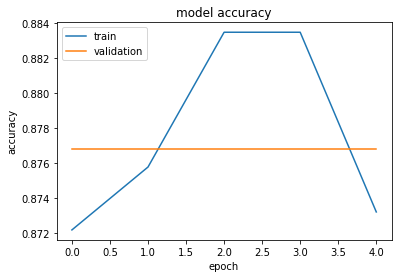

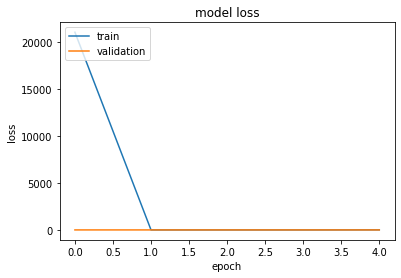

In [ ]:
plot_results(history5)

In [ ]:
path = "logs/fit/history5"+ datetime.datetime.now().strftime("%y%m%d.%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=path, histogram_freq=1)

In [ ]:
!rm -rf './logs/fit/history5'
# history = model.fit(X_train_flattened, y_train, validation_split=0.2, epochs=80, batch_size=128, verbose=1, callbacks = [tensorboard_callback])

### Evaluate the model
---

In [ ]:
X_test_stacked = np.stack((X_test,)*3, axis=-1)
model5.evaluate(X_test_stacked, y_test)

33/33 [==============================] - 2s 43ms/step - loss: 0.3464 - accuracy: 0.8860


[0.3463810980319977, 0.8860152959823608]

In [ ]:
%tensorboard --logdir logs/fit/history5

##**Model 6** 


### Model Definition
---
Defining the model requires that you first select the type of model that you need and then choose the architecture or network topology.


In [ ]:

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.regularizers import l1_l2
model6 = Sequential()
model6.add(data_augmentation)
base_model = tf.keras.applications.DenseNet201(input_shape=(100,100,3), include_top=False, pooling='max',weights='imagenet')
model6.add(base_model)
model6.add(BatchNormalization())
model6.add(Dense(2048, activation='relu', kernel_regularizer=l1_l2(0.01)))
model6.add(BatchNormalization())
model6.add(Dense(1, activation='sigmoid'))
for layer in model6.layers:
  layer.trainable = True

74842112/74836368 [==============================] - 0s 0us/step


In [1]:
%tensorflow_version 2.2

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.2`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.4.0


### Model Compilation
---
Compiling the model requires that you first select a loss function that you want to optimize, such as mean squared error or cross-entropy usually for binary classification.

In [ ]:
model6.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=1e-4), metrics=['accuracy'])

### Fitting the Model

---

In [ ]:
stacked_img = np.stack((X_train,)*3, axis=-1)
history6 = model6.fit(stacked_img, y_train, 
validation_split=0.2, callbacks = [es_callback], 
epochs=10, verbose=1,
validation_steps=22)

Epoch 1/10
61/61 [==============================] - 41s 245ms/step - loss: 726.8405 - accuracy: 0.5975 - val_loss: 561.9291 - val_accuracy: 0.8871
Epoch 2/10
61/61 [==============================] - 9s 140ms/step - loss: 513.3300 - accuracy: 0.7899 - val_loss: 378.1957 - val_accuracy: 0.5298
Epoch 3/10
61/61 [==============================] - 9s 141ms/step - loss: 338.7911 - accuracy: 0.8899 - val_loss: 232.8807 - val_accuracy: 0.5031
Epoch 4/10
61/61 [==============================] - 9s 141ms/step - loss: 202.6442 - accuracy: 0.9204 - val_loss: 124.3669 - val_accuracy: 0.7002
Epoch 5/10
61/61 [==============================] - 9s 143ms/step - loss: 103.3853 - accuracy: 0.9301 - val_loss: 52.6643 - val_accuracy: 0.6078
Epoch 6/10
61/61 [==============================] - 9s 144ms/step - loss: 40.5093 - accuracy: 0.8956 - val_loss: 15.3965 - val_accuracy: 0.9076
Epoch 7/10
61/61 [==============================] - 9s 144ms/step - loss: 11.4245 - accuracy: 0.9062 - val_loss: 5.8667 - val_

### Evaluate the model
---

In [ ]:
stacked_img.shape

(2435, 100, 100, 3)

In [ ]:
X_test_stacked = np.stack((X_test,)*3, axis=-1)
model6.evaluate(X_test_stacked, y_test)

33/33 [==============================] - 2s 65ms/step - loss: 2.7815 - accuracy: 0.9425


[2.7814927101135254, 0.9425287246704102]

In [ ]:
data = [] # initialize an empty numpy array
image_size = 100 # image size taken is 100 here. one can take other size too
img_path= '/content/Image_1.jpg'
img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) # converting the image to gray scale
print('Image array shape: \n\n', img_array.shape)
img_array = cv2.resize(img_array, (image_size,image_size)) # resizing the image array
print('Image array shape: \n\n', img_array.shape)
img_array = np.stack((img_array,)*3, axis=-1)
img_array = np.expand_dims(img_array, axis=0)
# img_array = np.array(img_array)
prediction = model6.predict(img_array)

Image array shape: 

 (320, 390)
Image array shape: 

 (100, 100)


In [ ]:
print(prediction)

[[1.]]


In [1]:
pip freeze > requirements.txt

In [ ]:
plot_results(history6)

# Saving and loading the model
---

In [ ]:
# saving the model
save_dir = "/results/"
model_name = 'binary-covid-model-6.h5'
model6.save(model_name)
model_path = save_dir + model_name
print('Saved trained model at %s ' % model_path)

Saved trained model at /results/binary-covid-model-6.h5 


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp -r /content/binary-covid-model-6.h5 /content/gdrive/MyDrive/

In [ ]:
# Loading the order of the image's name that has been provided
test_image_order = pd.read_csv("/content/content/covid_image_data/Testing_set_covid.csv")
test_image_order.head()


file_paths = [[fname, '/content/content/covid_image_data/test/' + fname] for fname in test_image_order['filename']]

# Confirm if number of images is same as number of labels given
if len(test_image_order) == len(file_paths):
  print('Number of image names i.e. ', len(test_image_order), 'matches the number of file paths i.e. ', len(file_paths))
else:
  print('Number of image names does not match the number of filepaths')

test_images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
test_images.head()

test_pixel_data = [] # initialize an empty numpy array
image_size = 100 # image size taken is 100 here. one can take other size too
for i in range(len(test_images)):

  img_array = cv2.imread(test_images['filepaths'][i], cv2.IMREAD_GRAYSCALE) # converting the image to gray scale

  new_img_array = cv2.resize(img_array, (image_size, image_size)) # resizing the image array
  # print(new_img_array.shape)
  test_pixel_data.append(new_img_array)
  
test_pixel_data = np.array(test_pixel_data)
print(test_pixel_data.shape)
# test_pixel_data = test_pixel_data.reshape(len(test_pixel_data), 100*100)
test_pixel_data = np.stack((test_pixel_data,)*3, axis=-1)
print('stacko',stacked_img.shape)
print('test',test_pixel_data.shape)
pred = model5.predict(test_pixel_data)
print('pred 0 : ',pred[0])
prediction = []
for value in pred:
  if value < 0.5:
    prediction.append(0)
  else:
    prediction.append(1)

res = pd.DataFrame({'filename': test_images['filename'], 'label': prediction}) # prediction is nothing but the final predictions of your model on input features of your new unseen test data
res.to_csv("submission.csv", index = False) # the csv file will be saved locally on the same location where this notebook is located.


In [ ]:
X_train_flattened.shape

In [ ]:
input_shape= (100,100,3)

InceptionResNetV2_layers = tf.keras.applications.InceptionResNetV2(weights='imagenet', include_top=False, 
                                               input_shape=input_shape)

for layer in InceptionResNetV2_layers.layers:
    layer.trainable = True


#Augmenting the images
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
    ]
)

# model.add(base_model)

model = Sequential()
model.add(data_augmentation)
#model.add(ResNet_layers)
model.add(InceptionResNetV2_layers)

# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Dense(3,activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=2e-5),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, 
                                               restore_best_weights=True,
                                               verbose=1)
stacked_img = np.stack((X_train,)*3, axis=-1)
print(stacked_img.shape)
model.fit(stacked_img,y_train,
          epochs = 30)

(2435, 100, 100, 3)
Epoch 1/30


ValueError: ignored

In [ ]:
print('abe')

In [ ]:
from keras.applications import DenseNet201
from keras.layers import *
from keras.models import Sequential
from keras.regularizers import *
from keras.optimizers import Adam

In [ ]:
model = Sequential()

conv_base = DenseNet201(input_shape=(100,100,3), include_top=False, pooling='max',weights='imagenet')
model.add(conv_base)
model.add(BatchNormalization())
model.add(Dense(2048, activation='relu', kernel_regularizer=l1_l2(0.01)))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

train_layers = [layer for layer in conv_base.layers[::-1][:5]]

for layer in conv_base.layers:
  if layer in train_layers:
    layer.trainable = True

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])


In [ ]:
model.summary()

In [ ]:
stacked_img = np.stack((X_train,)*3, axis=-1)
history7 = model.fit(stacked_img, y_train, validation_split=0.2, epochs=30, batch_size=30, callbacks = [es_callback], verbose=1)


In [ ]:
print('baba')

baba


In [ ]:
pip freeze > requirements.txt